# Überblick annotierter Bilder

In [1]:
# Import Packages
from Code.find_path_nextcloud import find_path_nextcloud
from Code.functions.class_ids import map_float_id2rgb, map_int_id2name
from Code.functions.import_labeled_data import import_labeled_data
import matplotlib.pyplot as plt
import spectral as spy
import pandas as pd
import numpy as np
import os

**Import Datan**

In [2]:
# Pfad Nextcloud bestimmen
path_nextcloud = find_path_nextcloud()

# Festlegung, welches Grid zusammengelegt werden soll
windowsize_r = 200
windowsize_c = 200

# Bestimmung annotation_folder
grid_folder = path_nextcloud + "Daten_Gyrocopter/Oldenburg/Teilbilder/grid_" + str(windowsize_r) + "_" + str(windowsize_c)

labeled_folder = grid_folder + '/labeled/'

df_annotations = import_labeled_data(path_labeled_folder=labeled_folder)

**Wie viele Pixel umfassen die annotiert Bilder insgesamt?**

In [3]:
df_annotations.shape[0]

1320000

**Wie viele Pixel wurden in den Bildern insgesamt annotiert?**

In [4]:
df_objects = df_annotations.loc[df_annotations['label'] != 0, ]
df_objects.shape[0]

1005611

**Wie viel Prozent der Pixel enthalten eine Klasse ungleich None?**

In [5]:
str((df_objects.shape[0] / df_annotations.shape[0]*100).__round__(1)) + ' %'

'76.2 %'

**Wie viel Prozent der Pixel wurden pro Bild annotiert?**

In [6]:
w = df_objects[['picture_name']].groupby(['picture_name'], as_index = False).size()
w['percent'] = (w['size'] / 40000 * 100).__round__(1)
w

picture_name   size  percent
0         Teilbild_Oldenburg_00000000_00000000_0_0_  32272     80.7
1       Teilbild_Oldenburg_00000000_00000002_0_400_  34865     87.2
2      Teilbild_Oldenburg_00000000_00000008_0_1600_  21559     53.9
3      Teilbild_Oldenburg_00000000_00000009_0_1800_  37953     94.9
4      Teilbild_Oldenburg_00000000_00000011_0_2200_  34791     87.0
5      Teilbild_Oldenburg_00000000_00000012_0_2400_  36382     91.0
6      Teilbild_Oldenburg_00000000_00000013_0_2600_  33635     84.1
7      Teilbild_Oldenburg_00000000_00000014_0_2800_  27305     68.3
8      Teilbild_Oldenburg_00000000_00000015_0_3000_  26049     65.1
9       Teilbild_Oldenburg_00000001_00000000_200_0_  36360     90.9
10   Teilbild_Oldenburg_00000001_00000005_200_1000_  39228     98.1
11   Teilbild_Oldenburg_00000001_00000012_200_2400_  28788     72.0
12   Teilbild_Oldenburg_00000001_00000014_200_2800_  25475     63.7
13   Teilbild_Oldenburg_00000001_00000016_200_3200_  11164     27.9
14      Teilbild_Oldenburg_00000002_00000000_400_0_  26240     65.6
15    Teilbild_Oldenburg_00000002_00000002_400_400_  20787     52.0
16   Teilbild_Oldenburg_00000002_00000008_400_1600_  33499     83.7
17   Teilbild_Oldenburg_00000002_00000016_400_3200_  26365     65.9
18   Teilbild_Oldenburg_00000003_00000016_600_3200_  29578     73.9
19   Teilbild_Oldenburg_00000004_00000012_800_2400_  29931     74.8
20   Teilbild_Oldenburg_00000005_00000001_1000_200_  33622     84.1
21  Teilbild_Oldenburg_00000005_00000011_1000_2200_  28753     71.9
22  Teilbild_Oldenburg_00000005_00000013_1000_2600_  25842     64.6
23     Teilbild_Oldenburg_00000006_00000000_1200_0_  25057     62.6
24  Teilbild_Oldenburg_00000006_00000010_1200_2000_  27387     68.5
25  Teilbild_Oldenburg_00000006_00000014_1200_2800_  32612     81.5
26     Teilbild_Oldenburg_00000007_00000000_1400_0_  36906     92.3
27  Teilbild_Oldenburg_00000007_00000006_1400_1200_  31917     79.8
28  Teilbild_Oldenburg_00000007_00000008_1400_1600_  33968     84.9
29     Teilbild_Oldenburg_00000008_00000000_1600_0_  30239     75.6
30  Teilbild_Oldenburg_00000008_00000005_1600_1000_  36443     91.1
31  Teilbild_Oldenburg_00000008_00000010_1600_2000_  37182     93.0
32  Teilbild_Oldenburg_00000008_00000012_1600_2400_  33457     83.6

**Wie sehen die Annotationen auf den Bildern aus?**

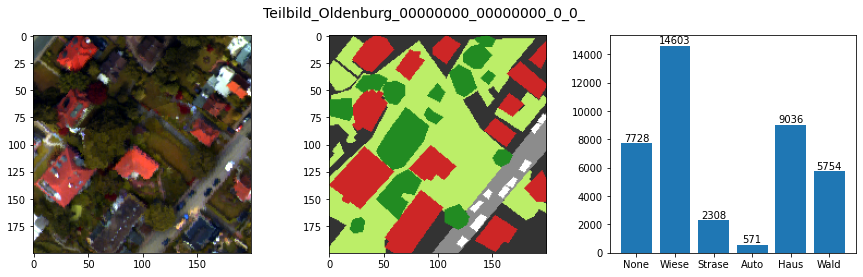

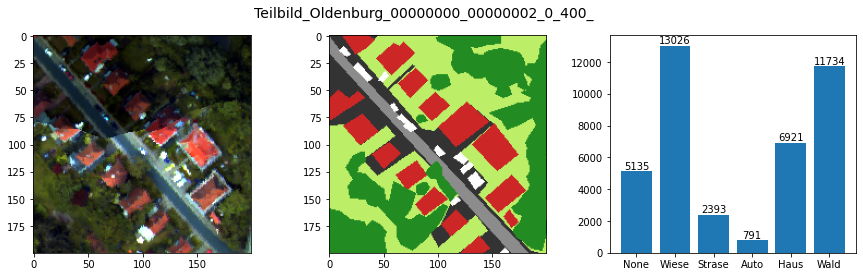

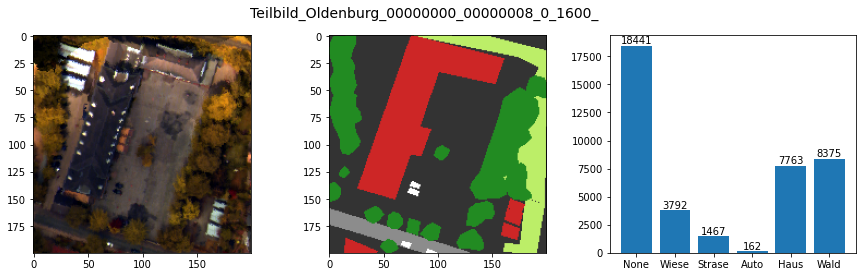

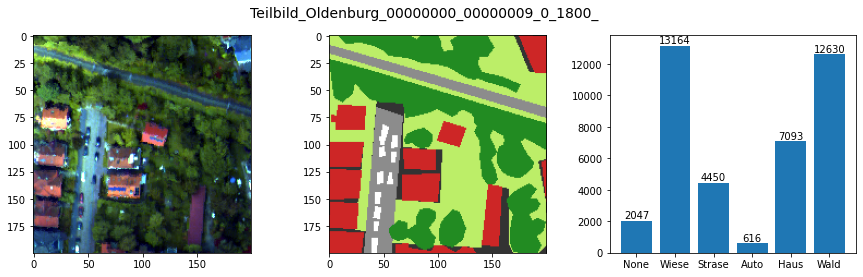

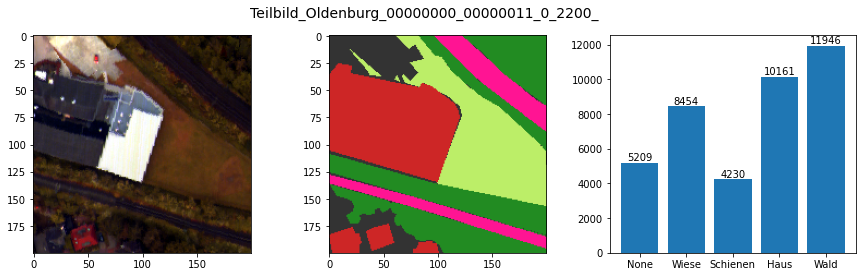

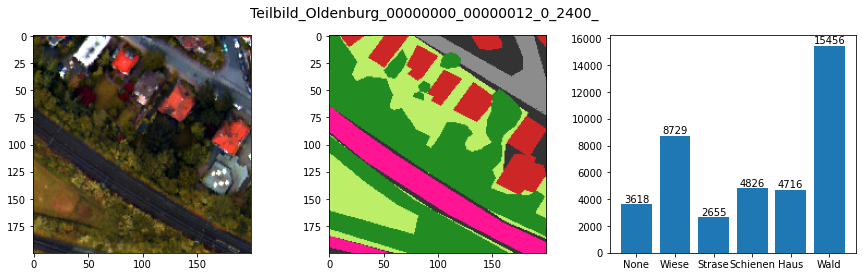

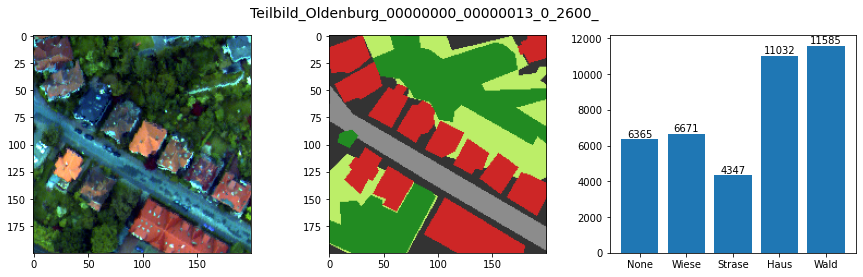

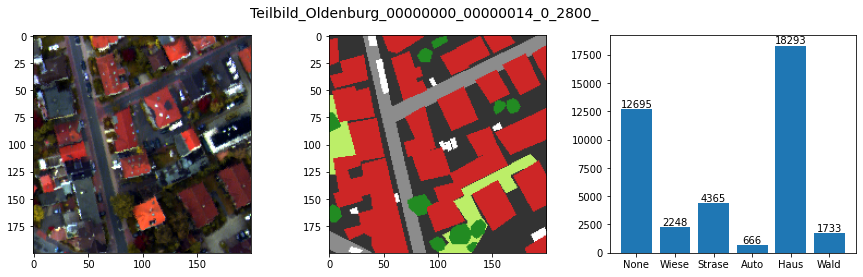

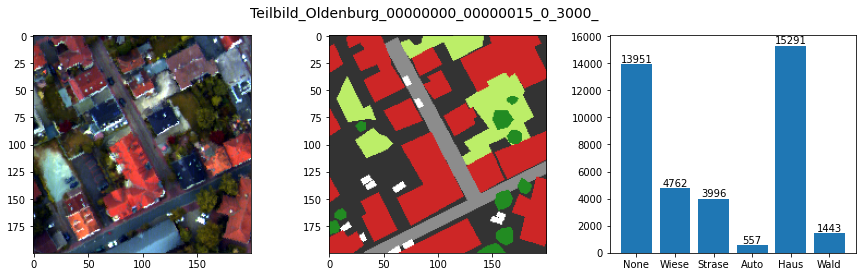

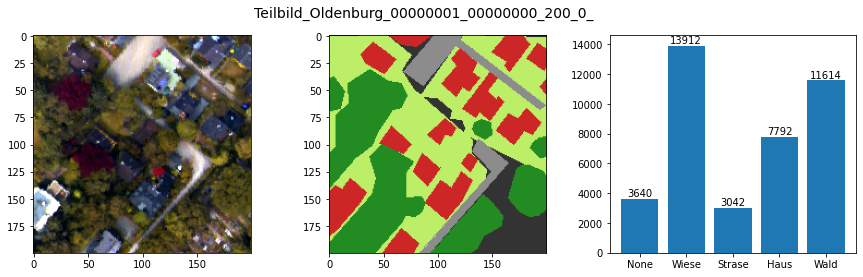

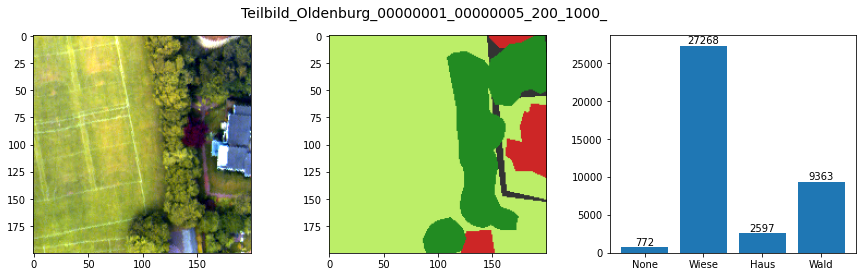

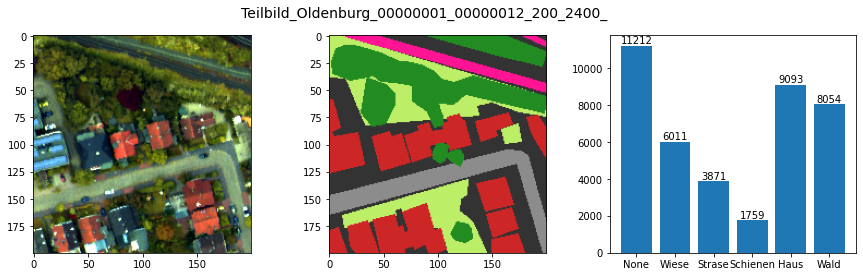

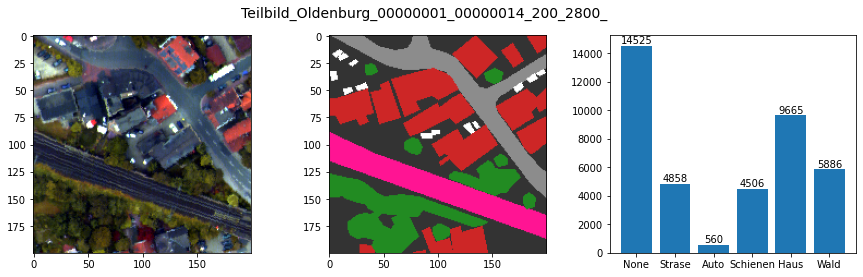

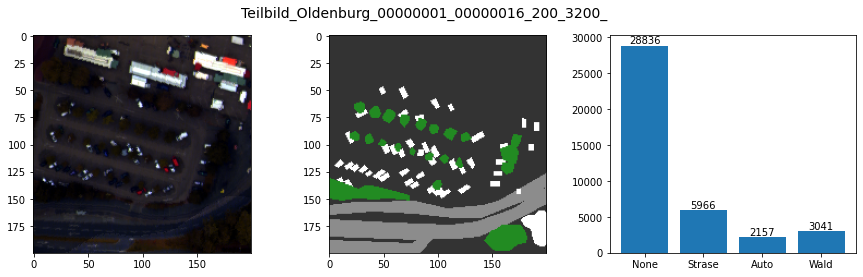

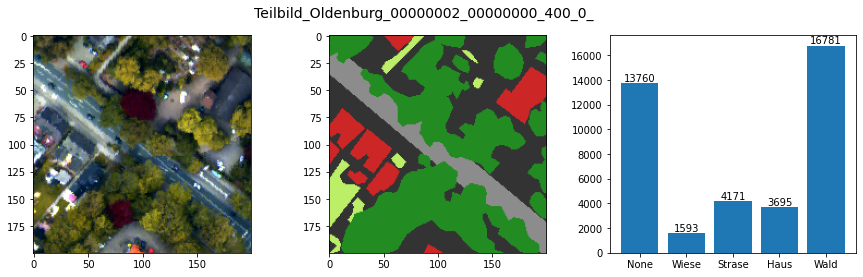

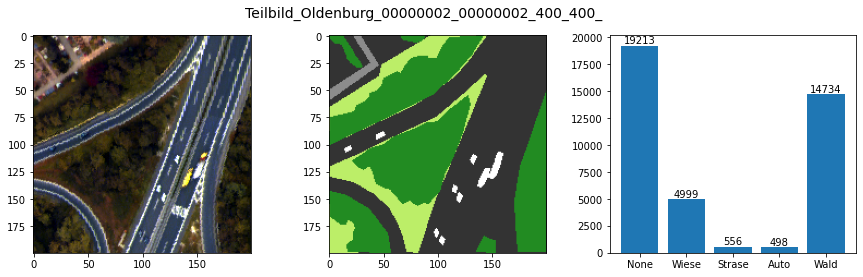

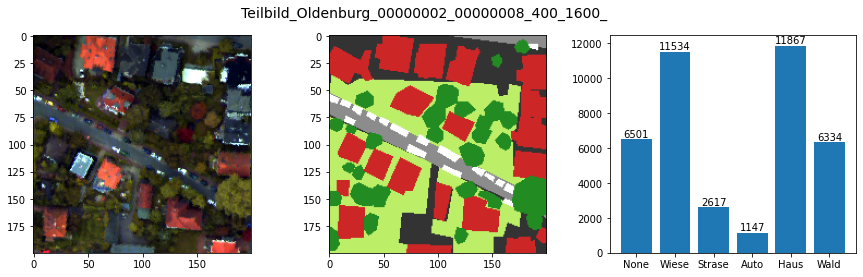

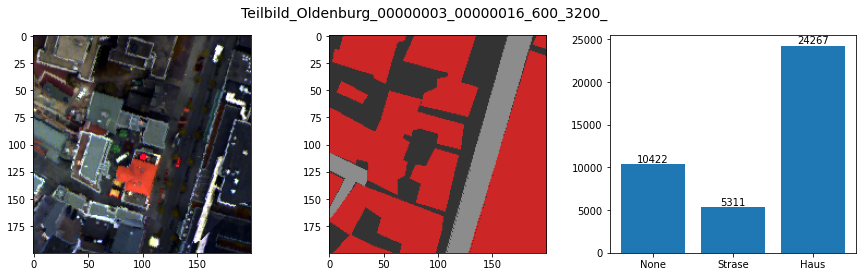

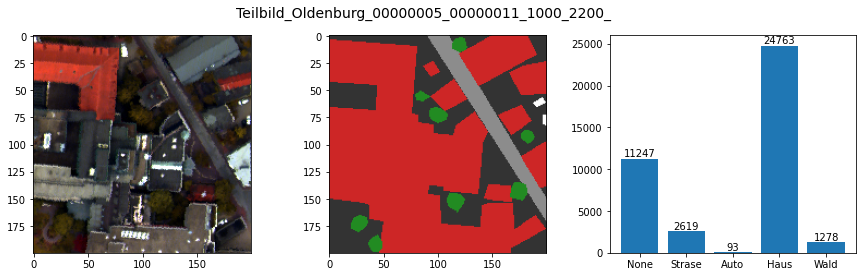

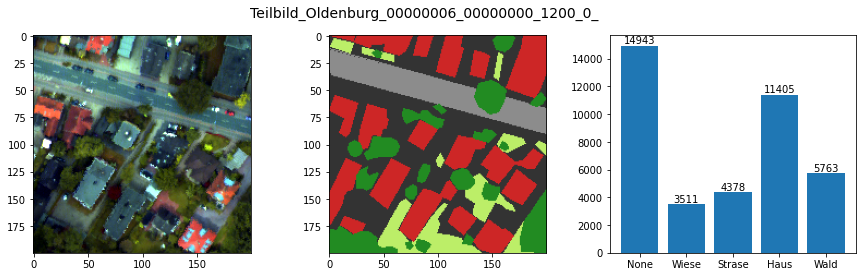

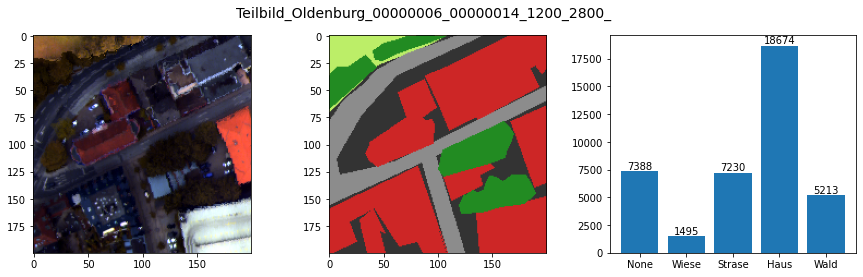

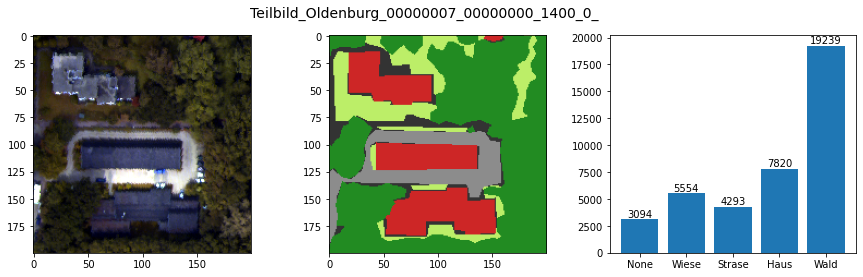

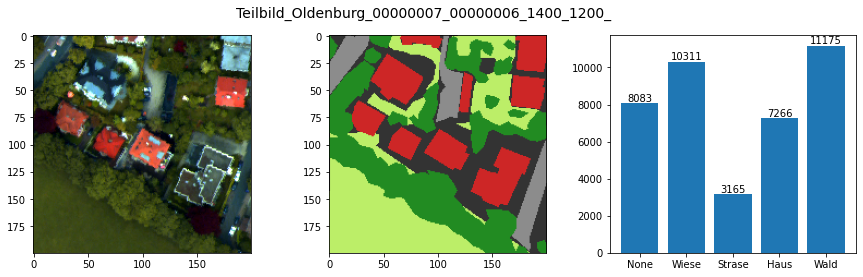

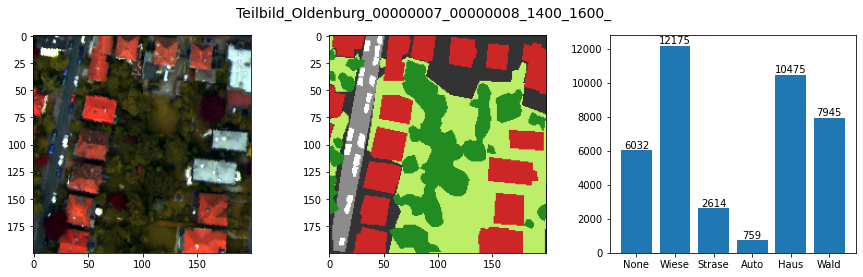

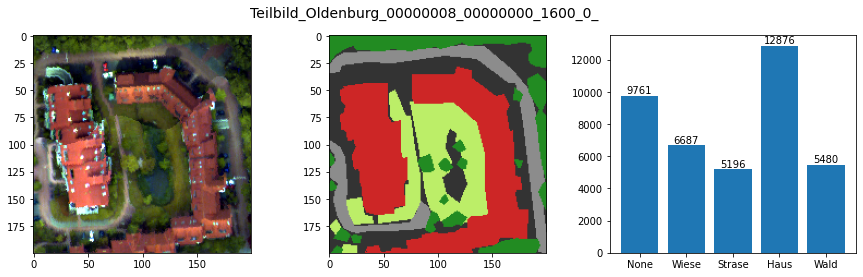

In [7]:
for image_name in df_annotations['picture_name'].unique():

    # select pixel for current image
    image = df_annotations.loc[df_annotations['picture_name'] == image_name, ]
    image = image.drop(columns=['picture_name'])

    # convert annotation ID to class_color
    df = map_float_id2rgb(dataframe=image, column='label')

    # extract color values
    df['class_color1'] = df['class_color'].apply(lambda x: x[0])
    df['class_color2'] = df['class_color'].apply(lambda x: x[1])
    df['class_color3'] = df['class_color'].apply(lambda x: x[2])

    # reshape pixel to image for rgb picture and select rgb channels
    img_rgb = np.reshape(np.array(image), (200, 200, 110))
    rgb_image = spy.get_rgb(img_rgb, bands=(59, 26, 1), stretch=(0.01, 0.99), stretch_all=True)

    # reshape pixel to image for annotation picture
    img_arr = np.array(df[['class_color1', 'class_color2', 'class_color3']])
    img_arr = np.reshape(img_arr, (200, 200, 3))

    # count pixel for each class
    count_class = image[['label']].groupby('label', as_index=False).size()
    count_class = map_int_id2name(dataframe=count_class, column='label')

    # create plot
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figwidth(15)
    ax[0].imshow(rgb_image)
    ax[1].imshow(img_arr)
    label = ax[2].bar(count_class['class_name'], count_class['size'], label=count_class['size'])
    ax[2].bar_label(label, label_type='edge')
    plt.suptitle(image_name, fontsize=14)
    plt.show()
    fig.savefig('data/annotated_picture/' + image_name)

**Wie sieht die Verteilung der Anzahl der annotierten Pixel über alle Klassen aus?**

In [8]:
    # count pixel for each class
    count_class = df_annotations[['label']].groupby('label', as_index=False).size()
    count_class = map_int_id2name(dataframe=count_class, column='label')

    # create plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_figwidth(15)
    label = ax.bar(count_class['class_name'], count_class['size'], label=count_class['size'])
    ax.bar_label(label, label_type='edge')
    plt.show()
    fig.savefig('data/annotated_picture/Anzahl_Pixel_pro_Klasse.png')